# Data analysis in Python 3 in application to mobile networks

Created by Timur Galiev (@TimurGaliev)

## Data analysis basics

<b>Goal</b>:
Get the skill of working with tabular data, learn how to make a graphical representation of the data under study in Python.

1) Importing the libraries: pandas, numpy, matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Uploading the excel file into our production environment

In [2]:
data = pd.read_excel('E_RAB_SETUP_FR.xlsx', engine='openpyxl')

2) Analysis of the data


In [3]:
print(data)

                       NAME   OBJECT_ID                  DT  E_RAB_SETUP_FR
0     LTE Huawei-LTE HUAWEI  LTE HUAWEI 2019-01-01 00:00:00        0.346794
1     LTE Huawei-LTE HUAWEI  LTE HUAWEI 2019-01-01 01:00:00        0.217487
2     LTE Huawei-LTE HUAWEI  LTE HUAWEI 2019-01-01 02:00:00        0.247145
3     LTE Huawei-LTE HUAWEI  LTE HUAWEI 2019-01-01 03:00:00        0.195883
4     LTE Huawei-LTE HUAWEI  LTE HUAWEI 2019-01-01 04:00:00        0.223099
...                     ...         ...                 ...             ...
8768  LTE Huawei-LTE HUAWEI  LTE HUAWEI 2020-01-01 19:00:00        0.323968
8769  LTE Huawei-LTE HUAWEI  LTE HUAWEI 2020-01-01 20:00:00        0.453942
8770  LTE Huawei-LTE HUAWEI  LTE HUAWEI 2020-01-01 21:00:00        0.375652
8771  LTE Huawei-LTE HUAWEI  LTE HUAWEI 2020-01-01 22:00:00        0.262556
8772  LTE Huawei-LTE HUAWEI  LTE HUAWEI 2020-01-01 23:00:00        0.140751

[8773 rows x 4 columns]


The data consists of 4 columns: NAME, OBJECT_ID, DT and E_RAB_SETUP_FR.

The observation period is from 2019 January 1st till 2020 January 1st. E_RAB_SETUP_FR is the percentage of unsuccessful connections using the E-RAB protocol (EPS Radio Access Bearer).

It is 8773 rows.

In [4]:
data['E_RAB_SETUP_FR'].describe()

count    8773.000000
mean        0.205370
std         0.237950
min         0.021416
25%         0.113500
50%         0.181949
75%         0.234323
max         7.417320
Name: E_RAB_SETUP_FR, dtype: float64

".describe()" command shows:

• the count of rows: 8773

• mean value µ: 0.205

• standard deviation σ: 0.237

• minumum value (0.02) and maximum value (7.41)

• first quartile (Q1/25th Percentile): the middle number between the smallest number (not the
“minimum”) and the median of the dataset: 0.113

• third quartile (Q3/75th Percentile): the middle value between the median and the highest
value (not the “maximum”) of the dataset: 0.23.

4) Visualizing the time series

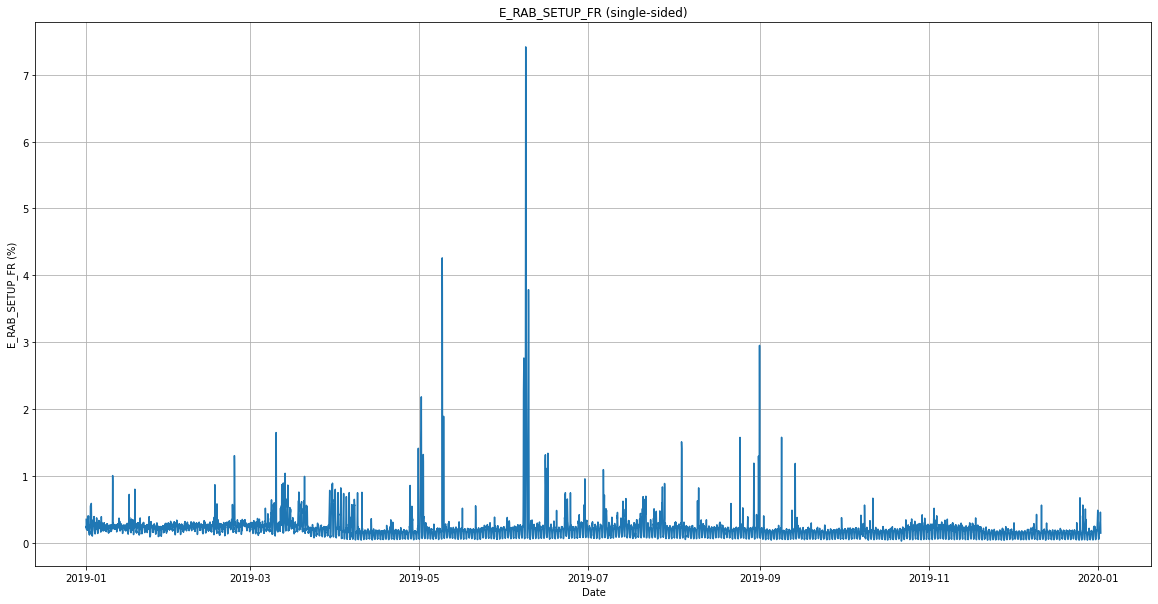

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data["DT"], data["E_RAB_SETUP_FR"])
plt.grid()
plt.xlabel('Date')
plt.ylabel('E_RAB_SETUP_FR (%)')
plt.title('E_RAB_SETUP_FR (single-sided)')
fig.set_figwidth(20)    
fig.set_figheight(10)
plt.show()

Visualizing the slice of data over a short period of time

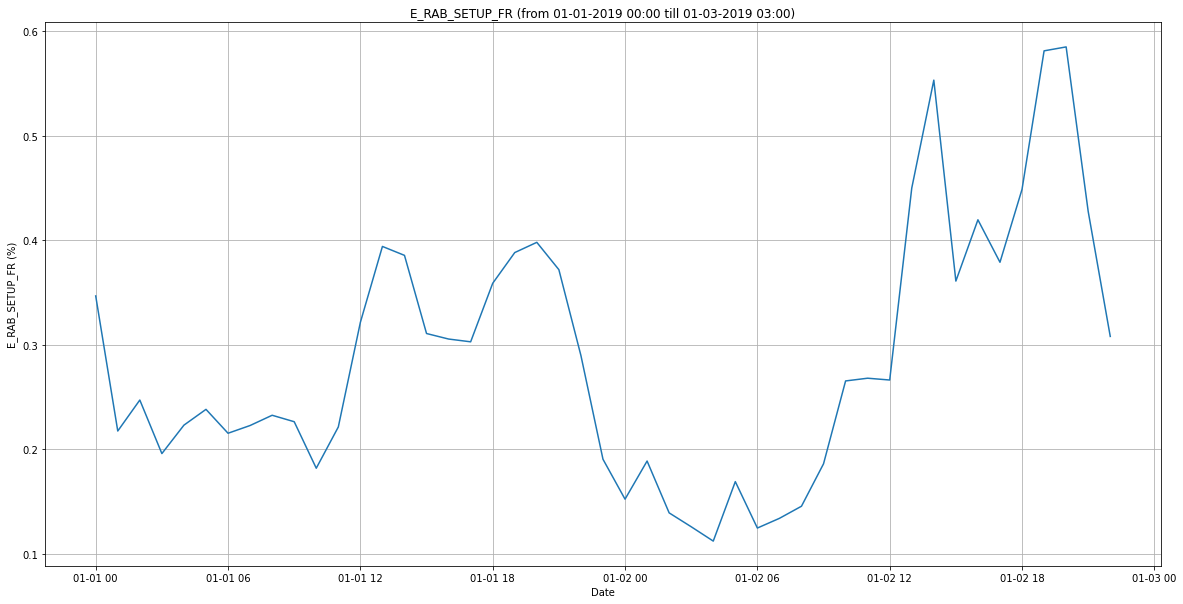

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data["DT"][0:47], data["E_RAB_SETUP_FR"][0:47])
plt.grid()
plt.xlabel('Date')
plt.ylabel('E_RAB_SETUP_FR (%)')
plt.title('E_RAB_SETUP_FR (from 01-01-2019 00:00 till 01-03-2019 03:00)')
fig.set_figwidth(20)    
fig.set_figheight(10)
plt.show()

5) Making a histogram of data

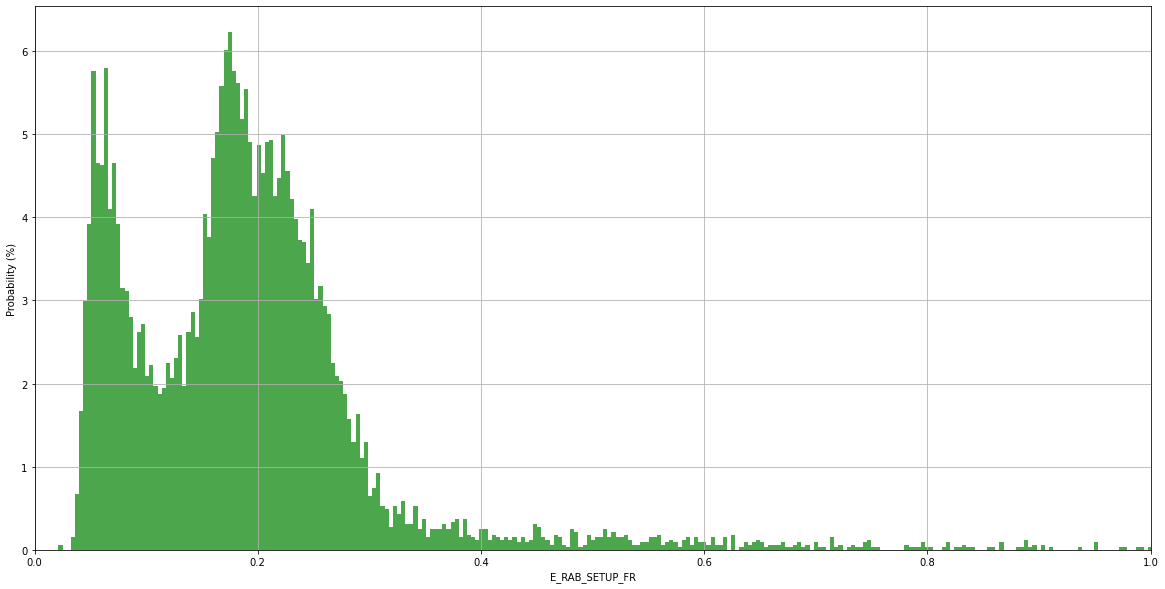

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data["E_RAB_SETUP_FR"], 2000, density=True, facecolor='g', alpha=0.7)
plt.grid()
plt.xlabel('E_RAB_SETUP_FR')
plt.ylabel('Probability (%)')
plt.xlim([0,1])
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

Adding new column, which includes the month numbers.

In [8]:
data['month'] = pd.DatetimeIndex(data['DT']).month

6) Building a box-plot of the data

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). (see [1])

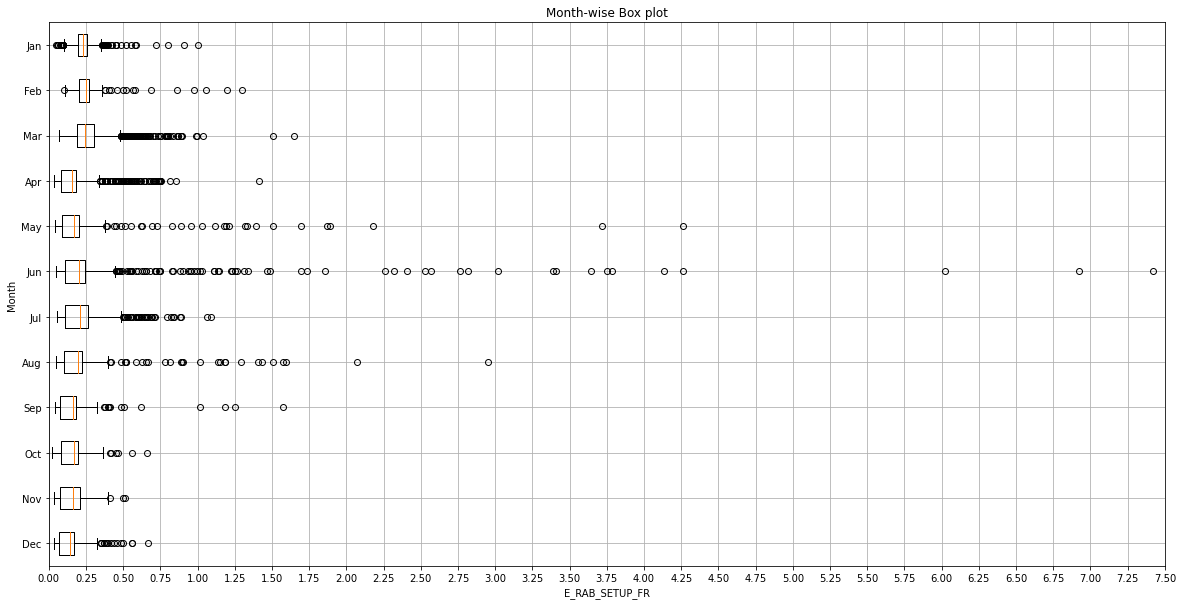

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([(data.loc[data['month'] == 12])['E_RAB_SETUP_FR'],
            (data.loc[data['month'] == 11])['E_RAB_SETUP_FR'],
            (data.loc[data['month'] == 10])['E_RAB_SETUP_FR'],
            (data.loc[data['month'] == 9])['E_RAB_SETUP_FR'],
            (data.loc[data['month'] == 8])['E_RAB_SETUP_FR'],
            (data.loc[data['month'] == 7])['E_RAB_SETUP_FR'],
            (data.loc[data['month'] == 6])['E_RAB_SETUP_FR'],
            (data.loc[data['month'] == 5])['E_RAB_SETUP_FR'],
            (data.loc[data['month'] == 4])['E_RAB_SETUP_FR'],
            (data.loc[data['month'] == 3])['E_RAB_SETUP_FR'],
            (data.loc[data['month'] == 2])['E_RAB_SETUP_FR'],
            (data.loc[data['month'] == 1])['E_RAB_SETUP_FR']],
            labels=['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul','Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'], vert=False)
fig.set_figwidth(20)    
fig.set_figheight(10)
plt.xticks(np.linspace(0,8,33))
plt.xlim([0,7.5])
plt.xlabel("E_RAB_SETUP_FR")
plt.ylabel("Month")
plt.title("Month-wise Box plot")
plt.grid()
plt.show()

We depicted the Month-wise Box Plot. It can be concluded that the narrowest interquartile range
(IQR is 25th to the 75th percentile) has been gotten in January (rectangular box). Median value is
located inside IQR. The Whiskers show the range Q1-1.5·IQR and Q3+1.5·IQR. The outliers are
shown as circles. Many outliers circles got in June. It means that the scattering of unuseccesseful
connections was more than in other cases.

## Primary statistical analysis

<b>Goal:</b> To consolidate the skill of working with tabular data, to consolidate the ability to make a
graphical representation of the data under study in Python, to get acquainted with the EM algorithm. 


EM-algorithm (see [2])

Gaussian Mixture (see [3])

Importing the libraries

In [13]:
from sklearn.mixture import GaussianMixture
from scipy import stats

Reshaping the "E_RAB_SETUP_FR" data from the row to the column. The output shape is (8773,1)

In [14]:
X = np.array(data["E_RAB_SETUP_FR"]).reshape(-1,1)

In [15]:
X.shape

(8773, 1)

In [16]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
for n_components in n_components_range:
    # Fit a Gaussian mixture with EM
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)
    bic.append(gmm.bic(X))
    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        best_gmm = gmm

bic = np.array(bic)
clf = best_gmm

Text(0.5, 0, 'Number of components')

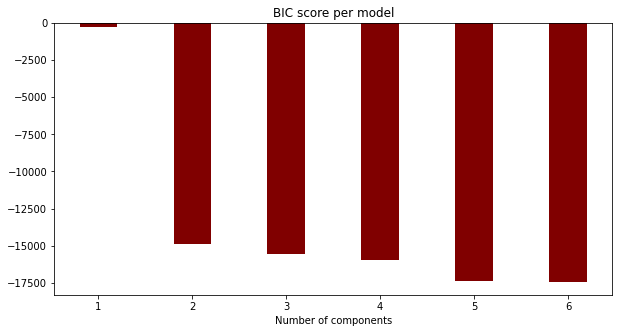

In [17]:
fig = plt.figure(figsize = (10, 5))
plt.bar(np.linspace(1,6,6), bic, color ='maroon',
        width = 0.4)
plt.title("BIC score per model")
plt.xlabel("Number of components")

In [18]:
clf

GaussianMixture(n_components=6)

From sklearn, we use the GaussianMixture class which implements the EM algorithm for fitting
a mixture of Gaussian models. N_components sets to 2, because adding another cluster doesn’t
give much better modeling of the data <b>(elbow method)</b>

The model with the best fit was chosen, using Bayesian Information Criterion

In [19]:
GMM = GaussianMixture(n_components = 2, init_params = 'random')
GMM.fit(X)
print('Converged', GMM.converged_)

Converged True


In [20]:
Yhat = GMM.predict(X)

The weights of each mixture components


In [21]:
print(GMM.weights_)

[0.05784742 0.94215258]


The covariance of each mixture component.

In [22]:
print(GMM.covariances_)

[[[0.57920475]]

 [[0.00593158]]]


The shape of the predicted column.

In [23]:
Yhat.shape

(8773,)

Adding a new column, which consists of the predicted variables

In [24]:
data['EM'] = Yhat

For instance, the probabilities that 0.27 is predicted between two components

In [22]:
Y = np.array([[0.27]])
prediction = GMM.predict_proba(Y)

In [23]:
prediction

array([[0.01129549, 0.98870451]])

Mean values of components

In [24]:
GMM.means_

array([[0.73975082],
       [0.17257458]])

The function for plotting a histogram and KDEs was written.

Input parameters: data, EM model, a number of bins, the limit of x-axis

In [25]:
def plot(data, GMM, bins, xlim = [0,1]):
    fig = plt.figure(figsize=(10, 5), dpi=100)
    ax = fig.add_subplot(111)
    n, bins, patches = plt.hist(data["E_RAB_SETUP_FR"], bins=bins, density=1, label = 'E_RAB_SETUP_FR')
    gkde=stats.gaussian_kde((data.loc[data['EM'] == 0])['E_RAB_SETUP_FR'])
    l = plt.plot(bins, gkde.evaluate(bins)*GMM.weights_[0], 'y', linewidth=4, label = 'Component 1')
    gkde=stats.gaussian_kde((data.loc[data['EM'] == 1])['E_RAB_SETUP_FR'])
    l = plt.plot(bins, gkde.evaluate(bins)*GMM.weights_[1], 'r', linewidth=4, label = 'Component 2')
    plt.title("EM")
    plt.legend()
    plt.grid()
    plt.xlim(xlim[0],xlim[1])

Examples:

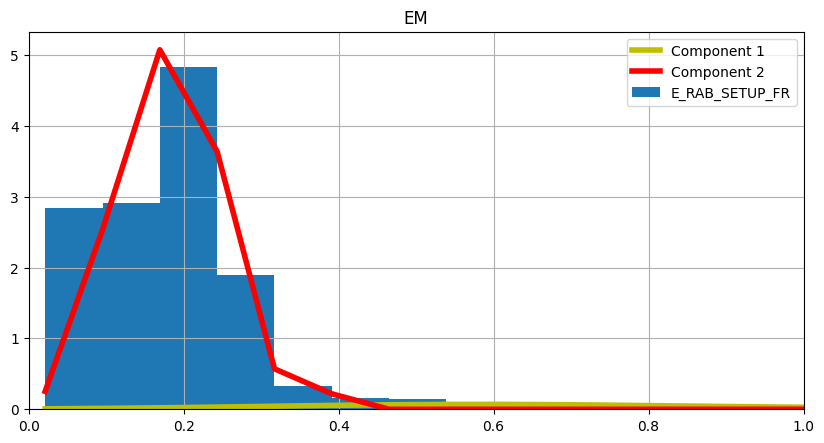

In [26]:
bins = 100
plot(data, GMM, bins)

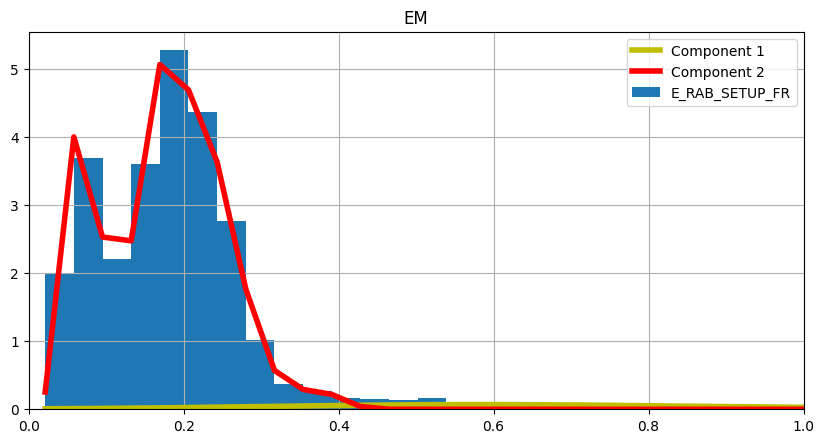

In [27]:
bins = 200
plot(data, GMM, bins)

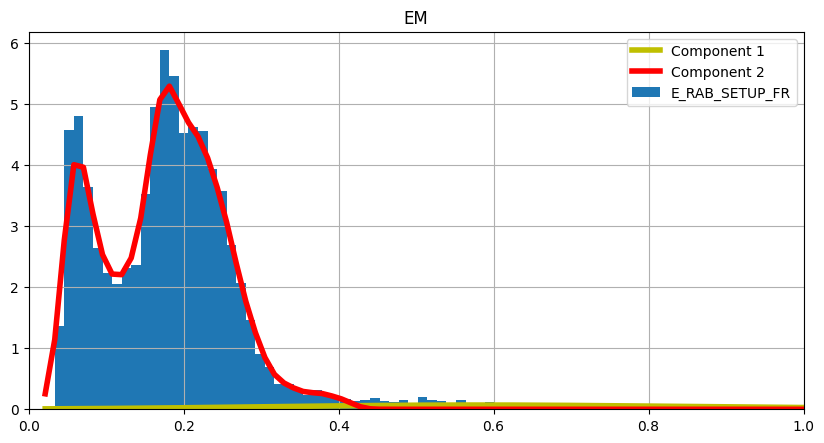

In [28]:
bins = 600
plot(data, GMM, bins)

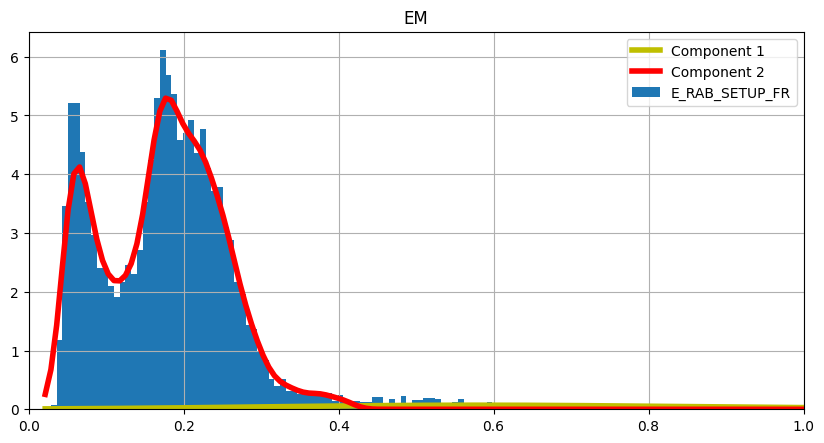

In [29]:
bins = 1000
plot(data, GMM, bins)

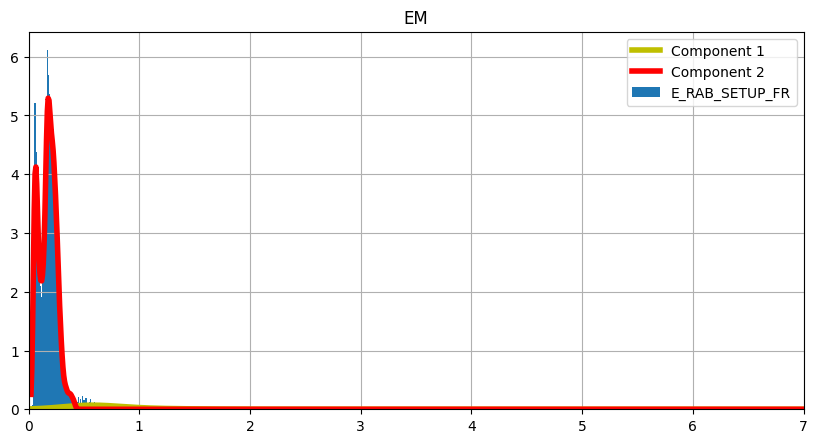

In [30]:
bins = 1000
plot(data, GMM, bins, [0,7])

<b>Conclusion:</b> We got acquainted with the EM algorithm. The data was divided into two clusters by
using Bayesian Information Criterion. We plotted the histograms with kdes. By increasing the
number of bins, the component 2 becomes looking like the polynomial distribution.

## Examples 

Let’s consider the case of 3 components: night, day and ejecting clusters.
The cluster methods[6].:

In [12]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [5]:
XX_ = np.array(data["E_RAB_SETUP_FR"]).reshape(-1,1)

In [36]:
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(XX_)

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X)

In [3]:
data['hour'] = pd.DatetimeIndex(data['DT']).hour

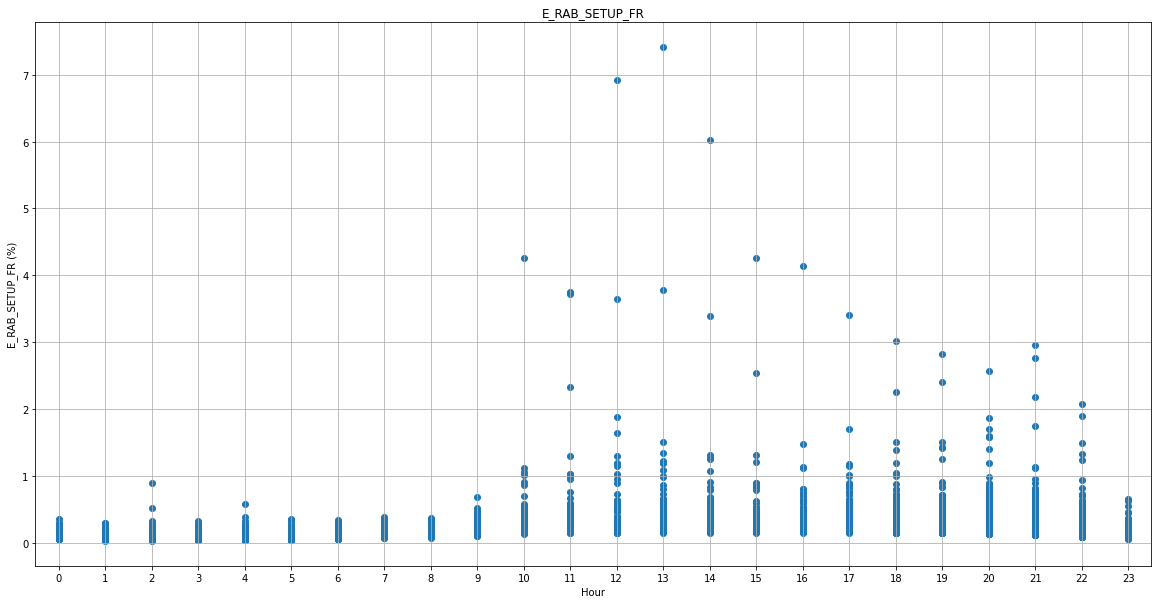

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data['hour'], data['E_RAB_SETUP_FR'])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('E_RAB_SETUP_FR (%)')
plt.title('E_RAB_SETUP_FR')
fig.set_figwidth(20)    
fig.set_figheight(10)
ax.set_xticks(np.linspace(0,23,24))
ax.set_xlim([-0.5,23.5])
plt.show()

### Gaussian Mixture

In [37]:
GMM = GaussianMixture(n_components = 3, init_params = 'random')
data['Gaussian'] = GMM.fit(X).predict(X)

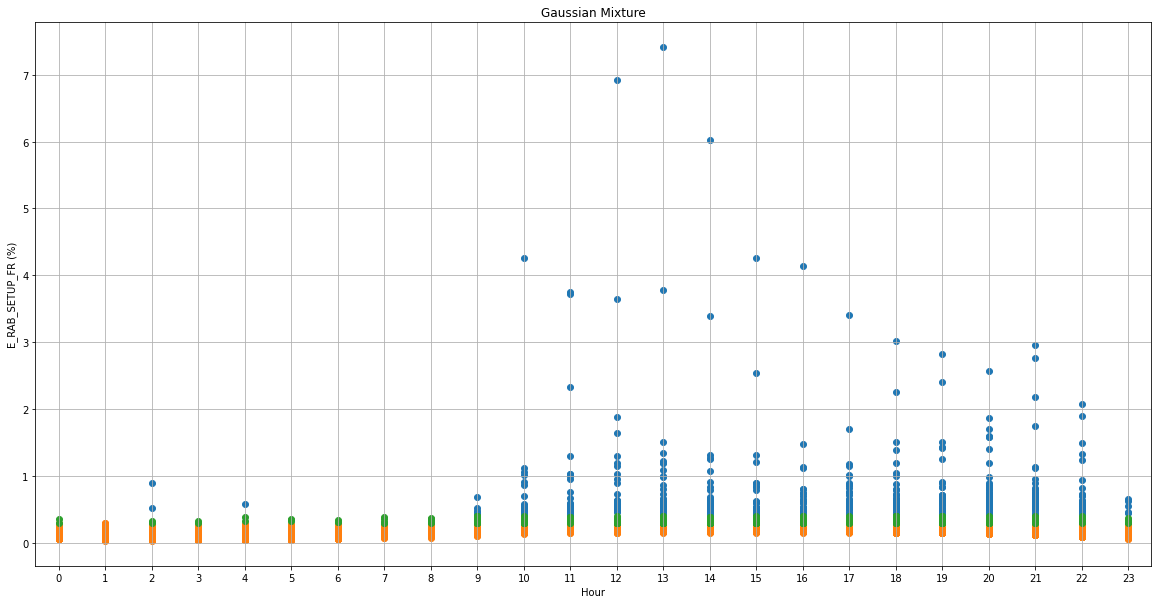

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(data['Gaussian'].min(), data['Gaussian'].max()+1):
    ax.scatter((data.loc[data['Gaussian'] == i])["hour"], (data.loc[data['Gaussian'] == i])["E_RAB_SETUP_FR"])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('E_RAB_SETUP_FR (%)')
plt.title('Gaussian Mixture')
fig.set_figwidth(20)    
fig.set_figheight(10)
ax.set_xticks(np.linspace(0,23,24))
ax.set_xlim([-0.5,23.5])
plt.show()

### MiniBatch KMeans

In [39]:
two_means = cluster.MiniBatchKMeans(n_clusters=3)
data['KMeans'] = two_means.fit(X).predict(X)

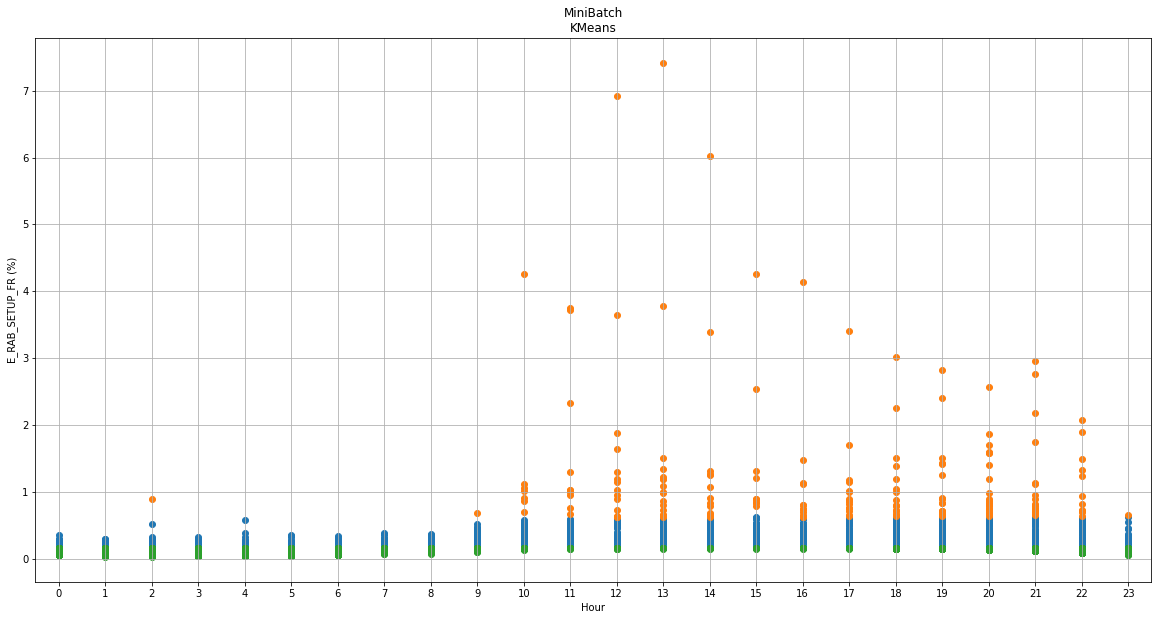

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter((data.loc[data['KMeans'] == 0])["hour"], (data.loc[data['KMeans'] == 0])["E_RAB_SETUP_FR"])
ax.scatter((data.loc[data['KMeans'] == 1])["hour"], (data.loc[data['KMeans'] == 1])["E_RAB_SETUP_FR"])
ax.scatter((data.loc[data['KMeans'] == 2])["hour"], (data.loc[data['KMeans'] == 2])["E_RAB_SETUP_FR"])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('E_RAB_SETUP_FR (%)')
plt.title('MiniBatch\nKMeans')
fig.set_figwidth(20)    
fig.set_figheight(10)
ax.set_xticks(np.linspace(0,23,24))
ax.set_xlim([-0.5,23.5])
plt.show()

### MeanShift

In [41]:
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
data['MeanShift'] = ms.fit(X).predict(X)

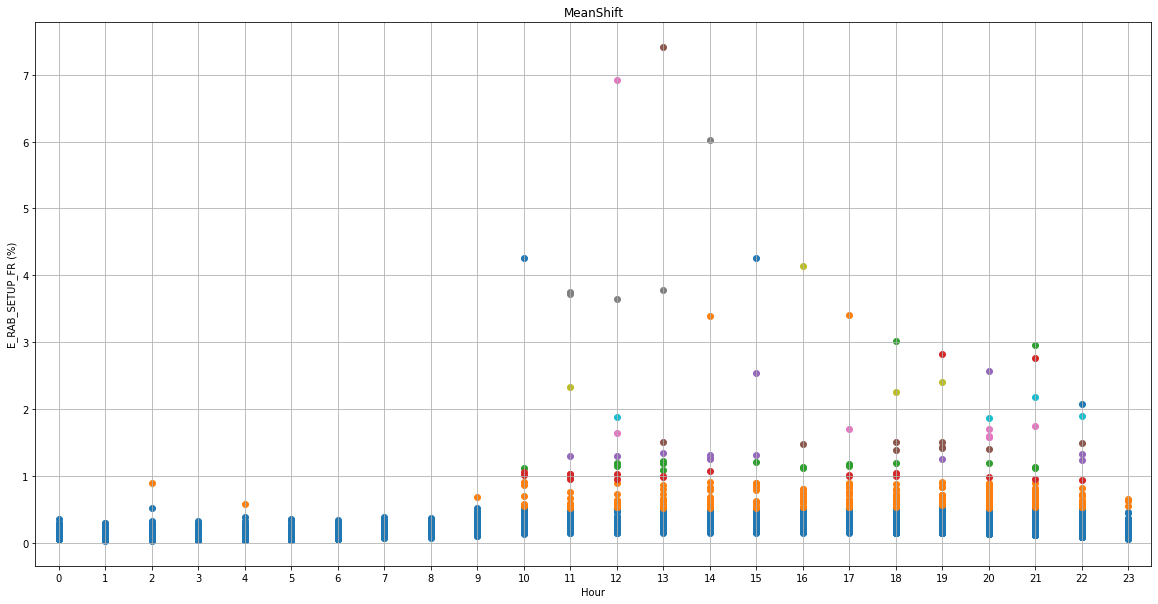

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(0, data['MeanShift'].max()+1):
    ax.scatter((data.loc[data['MeanShift'] == i])["hour"], (data.loc[data['MeanShift'] == i])["E_RAB_SETUP_FR"])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('E_RAB_SETUP_FR (%)')
plt.title('MeanShift')
fig.set_figwidth(20)    
fig.set_figheight(10)
ax.set_xticks(np.linspace(0,23,24))
ax.set_xlim([-0.5,23.5])
plt.show()

### Ward

In [43]:
ward = cluster.AgglomerativeClustering(n_clusters=3, linkage="ward")
data['Ward'] = ward.fit_predict(X)

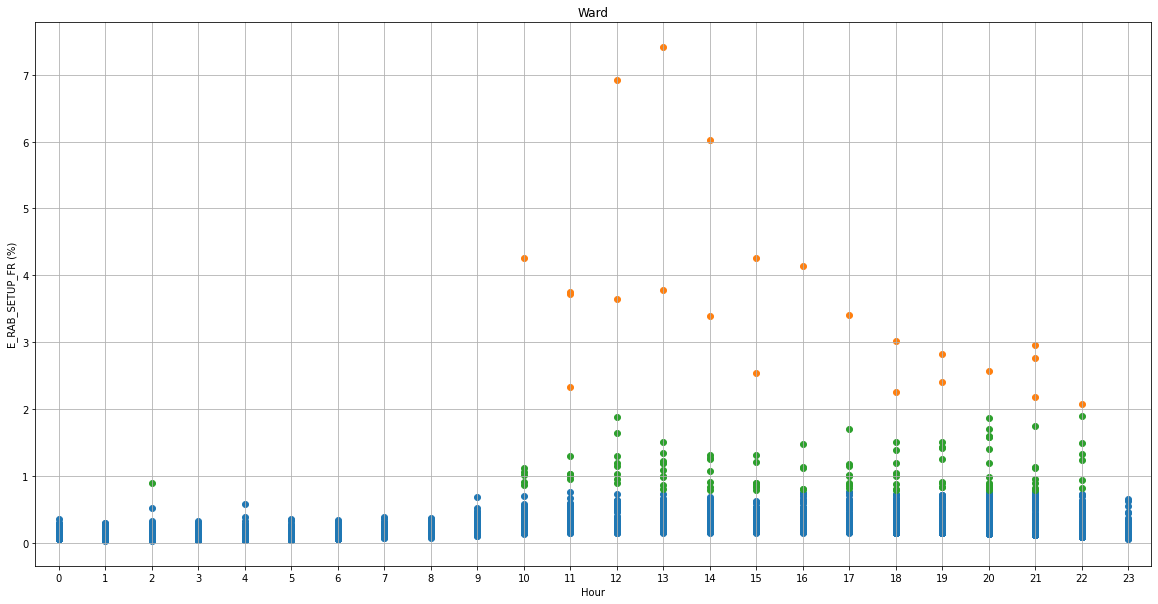

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(0, data['Ward'].max()+1):
    ax.scatter((data.loc[data['Ward'] == i])["hour"], (data.loc[data['Ward'] == i])["E_RAB_SETUP_FR"])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('E_RAB_SETUP_FR (%)')
plt.title('Ward')
fig.set_figwidth(20)    
fig.set_figheight(10)
ax.set_xticks(np.linspace(0,23,24))
ax.set_xlim([-0.5,23.5])
plt.show()

### Agglomerative Clustering

In [46]:
average_linkage = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock", n_clusters=3)
data['Average_Linkage'] = average_linkage.fit_predict(X)

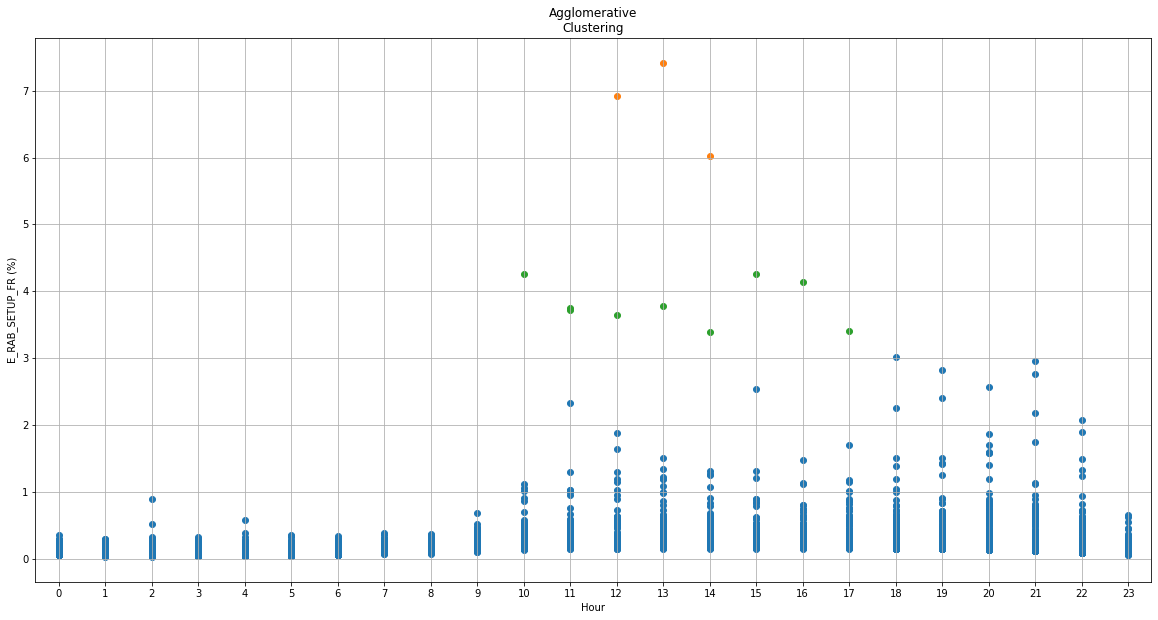

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(0, data['Average_Linkage'].max()+1):
    ax.scatter((data.loc[data['Average_Linkage'] == i])["hour"], (data.loc[data['Average_Linkage'] == i])["E_RAB_SETUP_FR"])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('E_RAB_SETUP_FR (%)')
plt.title('Agglomerative\nClustering')
fig.set_figwidth(20)    
fig.set_figheight(10)
ax.set_xticks(np.linspace(0,23,24))
ax.set_xlim([-0.5,23.5])
plt.show()

### DBSCAN

In [48]:
dbscan = cluster.DBSCAN()
data['dbscan'] = dbscan.fit_predict(X)

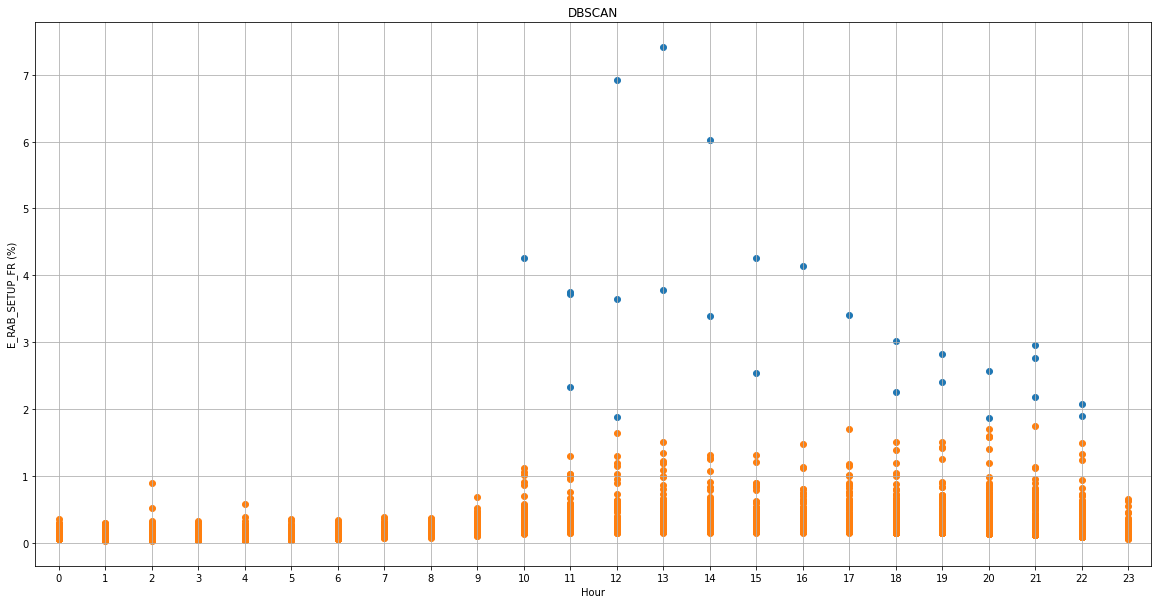

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(data['dbscan'].min(), data['dbscan'].max()+1):
    ax.scatter((data.loc[data['dbscan'] == i])["hour"], (data.loc[data['dbscan'] == i])["E_RAB_SETUP_FR"])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('E_RAB_SETUP_FR (%)')
plt.title('DBSCAN')
fig.set_figwidth(20)    
fig.set_figheight(10)
ax.set_xticks(np.linspace(0,23,24))
ax.set_xlim([-0.5,23.5])
plt.show()

### Optics

In [50]:
optics = cluster.OPTICS(min_samples=3)
data['optics'] = optics.fit_predict(X)

c:\users\timur\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


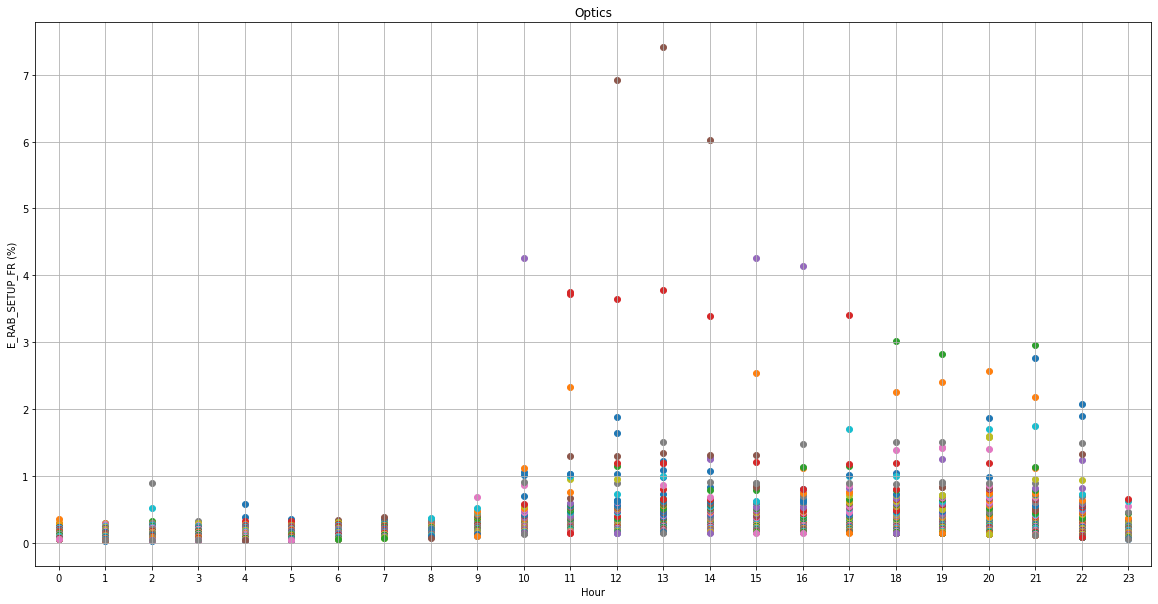

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(data['optics'].min(), data['optics'].max()+1):
    ax.scatter((data.loc[data['optics'] == i])["hour"], (data.loc[data['optics'] == i])["E_RAB_SETUP_FR"])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('E_RAB_SETUP_FR (%)')
plt.title('Optics')
fig.set_figwidth(20)    
fig.set_figheight(10)
ax.set_xticks(np.linspace(0,23,24))
ax.set_xlim([-0.5,23.5])
plt.show()

### Birch

In [52]:
birch = cluster.Birch(n_clusters=3)
data['birch'] = birch.fit_predict(X)

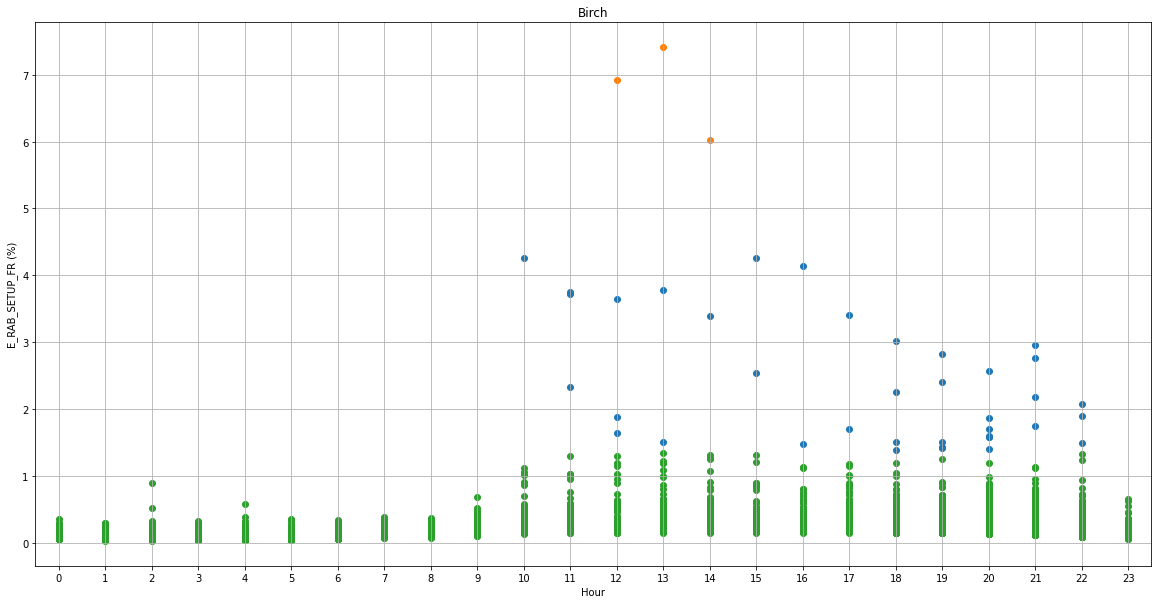

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(data['birch'].min(), data['birch'].max()+1):
    ax.scatter((data.loc[data['birch'] == i])["hour"], (data.loc[data['birch'] == i])["E_RAB_SETUP_FR"])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('E_RAB_SETUP_FR (%)')
plt.title('Birch')
fig.set_figwidth(20)    
fig.set_figheight(10)
ax.set_xticks(np.linspace(0,23,24))
ax.set_xlim([-0.5,23.5])
plt.show()

## Useful links 

1. Understanding Boxplots,  URL: https://medium.com/towards-data-science/understanding-boxplots-5e2df7bcbd51
2. Разбираем EM-algorithm на маленькие кирпичики, URL: https://habr.com/ru/post/501850/
3. GaussianMixture, URL: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
4. Mixture model cluster analysis under diff e model cluster analysis under different covariance ariance
structures using information complexity, URL: https://trace.tennessee.edu/cgi/viewcontent.cgi?article=2096&context=utk_gradthes&httpsredir=1&referer=
5. In Depth: Gaussian Mixture Models, URL: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
6. Clustering, URL: https://scikit-learn.org/stable/modules/clustering.html